In [49]:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [50]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
import gotranJIT
from gotran.model.loadmodel import load_ode

In [52]:
import analyzeODE as ao
import numpy as np
import matplotlib.pylab as plt

In [53]:
from analyzeODE import PlotMorotti

In [54]:
import Case 
cases = dict()
class empty:pass

In [442]:
import downSamplePickles
case1Hz = empty()
root = "/home/cesc235/wholecell/wholecell/"
percents = ['0p50', '0p60', '0p70', '0p80', '0p90', '1p00','1p10','1p20','1p30','1p40','1p50']
#percents = ['0p50', '0p60', '0p70']
num_percents = len(percents)
print num_percents
#maxCai = np.zeros((num_percents, num_percents))
#minCai = np.zeros((num_percents, num_percents))
diffCai = np.zeros((num_percents, num_percents))
diffCaSR = np.zeros((num_percents, num_percents))
maxCaSR_all = np.zeros((num_percents, num_percents))
minCaSR_all = np.zeros((num_percents, num_percents))
#print np.shape(fileNames)

for (i ,percent_i) in enumerate(percents):
    for (j, percent_j) in enumerate(percents):
    #print percent
        #print i, j
        file = "mouse_leak%sx_nka%s_freq1p0_dc_cat.pickle"%(percent_i,percent_j)

        #reducedFile = file.replace(".pickle","_red.pickle")

        if 0:
            #for i,file in enumerate(files):
            fileName = root+file
            print fileName
            downSamplePickles.downsample(fileName,10)
        #print reducedFile
        
        #case1Hz.fileName = root+reducedFile
        case1Hz.fileName = root+file
        case1Hz.data = ao.readPickle(case1Hz.fileName)
        #print case1Hz.fileName
            
        s = case1Hz.data['s']
        s_idx = case1Hz.data['s_idx']
        idx = s_idx.index("Cai")  
        maxCai = np.amax(s[100e3:100.5e3,idx])
        #print maxCai
        minCai = np.amin(s[100e3:100.5e3,idx])
        #print minCai 
        diffCai[i,j] = maxCai - minCai
        #print diffCai
        
        s = case1Hz.data['s']
        s_idx = case1Hz.data['s_idx']
        idx = s_idx.index("Ca_SR")
        maxCaSR = np.amax(s[100e3:100.5e3,idx])
        #print maxCai
        minCaSR = np.amin(s[100e3:100.5e3,idx])
        #print minCai
        maxCaSR_all[i,j] = maxCaSR
        minCaSR_all[i,j] = minCaSR
        diffCaSR[i,j] = maxCaSR - minCaSR
        
print diffCai
print diffCaSR

11
Reading /home/cesc235/wholecell/wholecell/mouse_leak0p50x_nka0p50_freq1p0_dc_cat.pickle
Reading /home/cesc235/wholecell/wholecell/mouse_leak0p50x_nka0p60_freq1p0_dc_cat.pickle
Reading /home/cesc235/wholecell/wholecell/mouse_leak0p50x_nka0p70_freq1p0_dc_cat.pickle
Reading /home/cesc235/wholecell/wholecell/mouse_leak0p50x_nka0p80_freq1p0_dc_cat.pickle
Reading /home/cesc235/wholecell/wholecell/mouse_leak0p50x_nka0p90_freq1p0_dc_cat.pickle
Reading /home/cesc235/wholecell/wholecell/mouse_leak0p50x_nka1p00_freq1p0_dc_cat.pickle
Reading /home/cesc235/wholecell/wholecell/mouse_leak0p50x_nka1p10_freq1p0_dc_cat.pickle
Reading /home/cesc235/wholecell/wholecell/mouse_leak0p50x_nka1p20_freq1p0_dc_cat.pickle
Reading /home/cesc235/wholecell/wholecell/mouse_leak0p50x_nka1p30_freq1p0_dc_cat.pickle
Reading /home/cesc235/wholecell/wholecell/mouse_leak0p50x_nka1p40_freq1p0_dc_cat.pickle
Reading /home/cesc235/wholecell/wholecell/mouse_leak0p50x_nka1p50_freq1p0_dc_cat.pickle
Reading /home/cesc235/wholece

In [197]:
font = {'weight' : 'bold',
        'size'   : 8}
matplotlib.rc('font', **font)

[[ 0.00033517  0.00031568  0.00029971  0.00028641  0.00027517  0.00026555
   0.00025723  0.00024998  0.00024361  0.00023796  0.00023291]
 [ 0.00038229  0.00035884  0.00033968  0.00032379  0.00031041  0.000299
   0.00028915  0.00028056  0.00027302  0.00026633  0.00026037]
 [ 0.00043564  0.0004075   0.00038464  0.00036571  0.00034981  0.00033626
   0.0003246   0.00031446  0.00030556  0.0002977   0.00029071]
 [ 0.00049598  0.00046234  0.00043507  0.00041261  0.00039379  0.00037781
   0.00036407  0.00035214  0.00034169  0.00033247  0.00032426]
 [ 0.00056437  0.00052411  0.00049169  0.00046508  0.00044285  0.00042404
   0.00040791  0.00039392  0.00038169  0.0003709   0.00036132]
 [ 0.00064173  0.00059374  0.00055524  0.00052376  0.00049758  0.00047546
   0.00045655  0.00044022  0.00042595  0.00041338  0.00040223]
 [ 0.00072863  0.00067199  0.00062653  0.00058938  0.00055858  0.00053266
   0.00051055  0.00049149  0.00047485  0.00046027  0.00044734]
 [ 0.00082438  0.00075901  0.000706    0.00

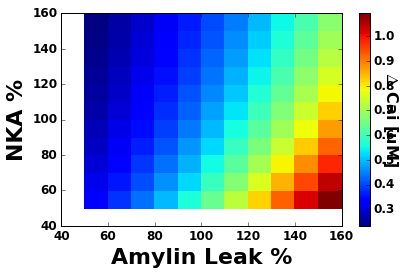

In [133]:
print diffCai
#print diffCai
#plt.plot(xy_coords,diffCai)

mM_to_uM = 1000

X,Y = meshgrid(np.arange(50,170,10), np.arange(50,170,10))
print X
print Y
Z=diffCai.T * mM_to_uM
plt.pcolormesh(X,Y,Z)
plt.xlabel("Amylin Leak %",weight="bold",size='22')
plt.ylabel("NKA %",weight="bold",size='22')
#plt.colorbar()
cbar = plt.colorbar()
cbar.set_label('$\Delta$ Cai [uM]', rotation = 270, weight="bold",size='16')
plt.tight_layout()
plt.gcf().savefig(root+"3d_nka_leak_100s.png")

[[ 0.23030801  0.22042361  0.21211119  0.2050318   0.19893458  0.1936308
   0.18897628  0.18485923  0.18119183  0.17790419  0.17494009]
 [ 0.25292999  0.24176937  0.23238628  0.22439959  0.21752573  0.21155078
   0.20631106  0.2016796   0.19755661  0.19386275  0.19053419]
 [ 0.2768451   0.26434862  0.25383243  0.24487846  0.2371725   0.23047597
   0.2246056   0.21941883  0.21480349  0.21067028  0.20694733]
 [ 0.30193511  0.28809062  0.27641283  0.2664541   0.25787574  0.25041761
   0.24387833  0.2381004   0.23295944  0.22835618  0.2242106 ]
 [ 0.32795772  0.31283998  0.3000201   0.28905183  0.27958714  0.27134642
   0.26411383  0.25771916  0.25202704  0.24692889  0.24233689]
 [ 0.35449782  0.33829842  0.32444594  0.31252707  0.3021976   0.29317896
   0.28524864  0.27822876  0.27197315  0.26636562  0.26131162]
 [ 0.3809472   0.36401863  0.34934855  0.33661255  0.32550511  0.31576264
   0.30716559  0.29953358  0.29271901  0.28660098  0.28108227]
 [ 0.40644382  0.38937187  0.37424241  0.3

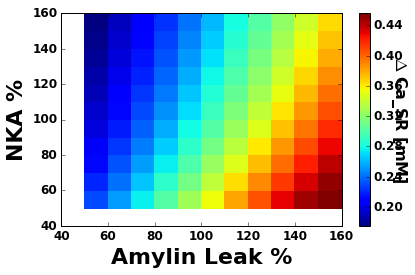

In [82]:
print diffCaSR
#print diffCai
#plt.plot(xy_coords,diffCai)

X,Y = meshgrid(np.arange(50,170,10), np.arange(50,170,10))
print X
print Y
Z=diffCaSR.T
plt.pcolormesh(X,Y,Z)
plt.xlabel("Amylin Leak %",weight="bold",size='22')
plt.ylabel("NKA %",weight="bold",size='22')
#plt.colorbar()
cbar = plt.colorbar()
cbar.set_label('$\Delta$ Ca_SR [mM]', rotation = 270, weight="bold",size='16')
plt.tight_layout()
plt.gcf().savefig(root+"3d_chart_100s_CaSR.png")

[[ 0.54848634  0.54065429  0.53392938  0.52808975  0.52296889  0.51843957
   0.51440298  0.51078125  0.50751216  0.50454544  0.50183999]
 [ 0.56584374  0.55735696  0.55009331  0.54380361  0.53830153  0.53344528
   0.5291252   0.52525519  0.52176676  0.51860473  0.51572414]
 [ 0.58357773  0.57436729  0.56650657  0.5597178   0.5537933   0.54857529
   0.54394207  0.53979838  0.53606866  0.53269223  0.52961977]
 [ 0.60174672  0.5917563   0.5832459   0.5759112   0.56952331  0.56390796
   0.55893073  0.55448651  0.55049203  0.54688056  0.54359804]
 [ 0.62034568  0.60955007  0.6003549   0.59243735  0.5855507   0.57950548
   0.57415485  0.56938374  0.56510098  0.5612335   0.55772211]
 [ 0.63927279  0.6277056   0.61782594  0.6093106   0.60190379  0.59540515
   0.58965758  0.58453709  0.579945    0.57580204  0.57204394]
 [ 0.65828524  0.64607939  0.63557648  0.6264876   0.61856528  0.61160746
   0.60545178  0.59996812  0.5950519   0.59061853  0.58659912]
 [ 0.67693587  0.66438694  0.65341959  0.

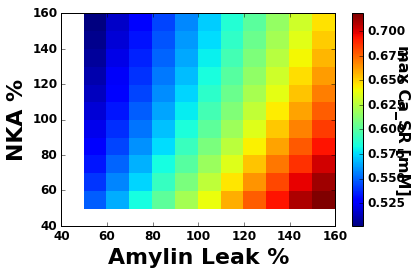

In [98]:
print maxCaSR_all
#print diffCai
#plt.plot(xy_coords,diffCai)

X,Y = meshgrid(np.arange(50,170,10), np.arange(50,170,10))
print X
print Y
Z = maxCaSR_all.T
plt.pcolormesh(X,Y,Z)
plt.xlabel("Amylin Leak %",weight="bold",size='22')
plt.ylabel("NKA %",weight="bold",size='22')
#plt.colorbar()
cbar = plt.colorbar()
cbar.set_label('max Ca_SR [mM]', rotation = 270, weight="bold",size='16')
plt.tight_layout()
plt.gcf().savefig(root+"3d_chart_100s_maxCaSR.png")

In [452]:
print maxCaSR_all[:,5] #NKA = 100%
print minCaSR_all[:,5]
print diffCaSR[5,5] 
print diffCaSR[:,5] 
print np.shape(diffCaSR[:,5])

[ 0.51843957  0.53344528  0.54857529  0.56390796  0.57950548  0.59540515
  0.61160746  0.62806076  0.64464329  0.6611421   0.67722521]
[ 0.32480877  0.3218945   0.31809931  0.31349035  0.30815906  0.30222619
  0.29584482  0.28921801  0.28257595  0.27617178  0.27028404]
0.293178961693
[ 0.1936308   0.21155078  0.23047597  0.25041761  0.27134642  0.29317896
  0.31576264  0.33884275  0.36206734  0.38497032  0.40694117]
(11,)


In [464]:
leak=np.linspace(0.5, 1.5, 11)
print leak
leak_ref=1.425

[ 0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5]


In [457]:
s = caseNKA.data['s']
s_idx = caseNKA.data['s_idx']
idx = s_idx.index("Cai")  
maxCai_amy = np.amax(s[100e3:100.5e3,idx])
print maxCai_amy
minCai_amy = np.amin(s[100e3:100.5e3,idx])
print minCai_amy
diffCai_amy = maxCai_amy - minCai_amy
print diffCai_amy
        
idx = s_idx.index("Ca_SR")
maxCaSR_amy = np.amax(s[100e3:100.5e3,idx])
print maxCaSR_amy
minCaSR_amy = np.amin(s[100e3:100.5e3,idx])
print minCaSR_amy
diffCaSR_amy = maxCaSR_amy - minCaSR_amy
print diffCaSR_amy

0.000812491922891
0.00011414443706
0.000698347485831
0.651497355553
0.27985765686
0.371639698693


In [466]:
s = caseHIP.data['s']
s_idx = caseHIP.data['s_idx']
idx = s_idx.index("Cai")  
maxCai_hip = np.amax(s[100e3:100.5e3,idx])
print maxCai_hip
minCai_hip = np.amin(s[100e3:100.5e3,idx])
print minCai_hip
diffCai_hip = maxCai_hip - minCai_hip
print diffCai_hip
        
idx = s_idx.index("Ca_SR")
maxCaSR_hip = np.amax(s[100e3:100.5e3,idx])
print maxCaSR_hip
minCaSR_hip = np.amin(s[100e3:100.5e3,idx])
print minCaSR_hip
diffCaSR_hip = maxCaSR_hip - minCaSR_hip
print diffCaSR_hip

0.000778284782305
0.000133214967702
0.000645069814603
0.599387251722
0.273753181524
0.325634070198


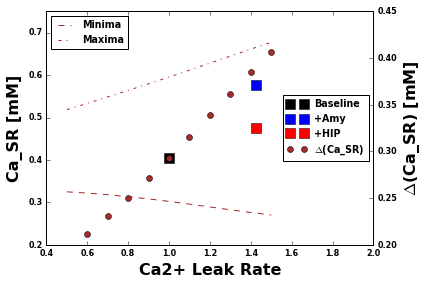

In [502]:
ax1 = plt.subplot(1,1,1)
ax1.plot(leak,minCaSR_all[:,5],'--',color='brown',label='Minima')
ax1.plot(leak,maxCaSR_all[:,5],'-.',color='brown',label='Maxima')
#ax1.legend(bbox_to_anchor=(1.75,1.0),fancybox=True, shadow=True)
ax1.legend(loc=2)

ax2 = ax1.twinx()


ax2.plot(leak[5],diffCaSR[5,5],'ks',ms=10,label='Baseline')
ax2.legend(loc=3)

ax2.plot(leak_ref,diffCaSR_amy,'bs',ms=10,label='+Amy')
ax2.legend(loc=3)

ax2.plot(leak_ref,diffCaSR_hip,'rs',ms=10,label='+HIP')
ax2.legend(loc=3)

ax2.plot(leak,diffCaSR[:,5],'o',color='brown',label='$\Delta$(Ca_SR)')
ax2.legend(loc=5)
#ax2.legend(bbox_to_anchor=(1.9,0.75),fancybox=True, shadow=True)

ax1.set_xlim([0.4,2.0])
ax1.set_ylim([0.2,0.75])
ax2.set_ylim([0.2,0.45])
ax1.set_ylabel("Ca_SR [mM]",fontsize=16,weight="bold")
ax1.set_xlabel("Ca2+ Leak Rate",fontsize=16,weight="bold")
#ax1.set_title("Ca_SR")
ax2.set_ylabel("$\Delta$(Ca_SR) [mM]",fontsize=16,weight="bold")

outFile='diff_CaSRConc.png'
plt.tight_layout()
plt.gcf().savefig(outFile,bbox_extra_Artists=(),bbox_inches='tight',dpi=300)

In [163]:
  import numpy as np

In [469]:
def PlotPickleData(data1,data2=None,idxName="V",ylabel="V (mV)",trange=None,
    case1legend = None, case2legend=None,ylim=False,
    ):

  #  idx1=runner.model.state_indices(idxName)   
  from matplotlib.ticker import FormatStrFormatter
  # fluxes
  ms_to_s = 1e-3
  s_to_min = 1/60
  mM_to_uM = 1e-3
  class empty:pass

  def mycont(data):
    datac = empty()
    datac.t = data['t'] * ms_to_s 
    datac.s = data['s'] / mM_to_uM
    datac.s_idx = data['s_idx']
    datac.j = data['j']
    datac.j_idx = data['j_idx']

    if idxName in datac.j_idx:
      datac.v = datac.j
      datac.v_idx = datac.j_idx
    # states 
    elif idxName in datac.s_idx:
      datac.v = datac.s
      datac.v_idx = datac.s_idx
    else:
      print idxName, " not found"
      datac.v =None

    return datac

  datac1 = mycont(data1)
  if data2!=None:
    datac2 = mycont(data2)


  fig = plt.figure()

  if trange==None:
    fig.add_subplot(111)

  else:
    trange = np.asarray(trange)
    plt.subplot(1,2,2)
    if datac1.v !=None:
      idx1 = datac1.v_idx.index(idxName)
      plt.plot(datac1.t,datac1.v[:,idx1],'b',label=case1legend)
    if data2!=None and datac2.v !=None:
      idx2 = datac2.v_idx.index(idxName)
      plt.plot(datac2.t,datac2.v[:,idx2],'k',label=case2legend)
    if ylim != False:
      plt.ylim(ylim)
    plt.xlim(trange*ms_to_s)
    plt.tight_layout()
    plt.subplot(1,2,1)


  if datac1.v !=None:
    idx1 = datac1.v_idx.index(idxName)
    plt.plot(datac1.t,datac1.v[:,idx1],'b',label=case1legend)
  if data2!=None and datac2.v !=None:
    idx2 = datac2.v_idx.index(idxName)
    plt.plot(datac2.t,datac2.v[:,idx2],'k',label=case2legend)
  plt.xlabel('time [s]',fontsize=14)
  plt.ylabel(ylabel+' [uM]',fontsize=14)
  legend = plt.legend(loc=3)
  legend.get_frame().set_facecolor('white')
  plt.tight_layout()


In [193]:
caseNKA50 = empty()
caseNKA50.caseName = "mouse_leak1p50x_nka1p50_freq1p0_dc_cat" 
caseNKA50.fileName = caseNKA50.caseName+".pickle"
caseNKA50.data = ao.readPickle(caseNKA50.fileName) 

Reading mouse_leak1p50x_nka1p50_freq1p0_dc_cat.pickle


In [368]:
caseWT = empty()
caseWT.caseName = "mouse_leak1p00x_nka1p00_freq1p0_dc_cat" 
caseWT.fileName = caseWT.caseName+".pickle"
caseWT.data = ao.readPickle(caseWT.fileName) 

Reading mouse_leak1p00x_nka1p00_freq1p0_dc_cat.pickle


In [468]:
caseLeak140 = empty()
caseLeak140.caseName = "mouse_leak1p40x_nka1p00_freq1p0_dc_cat" 
caseLeak140.fileName = caseLeak140.caseName+".pickle"
caseLeak140.data = ao.readPickle(caseLeak140.fileName) 

Reading mouse_leak1p40x_nka1p00_freq1p0_dc_cat.pickle


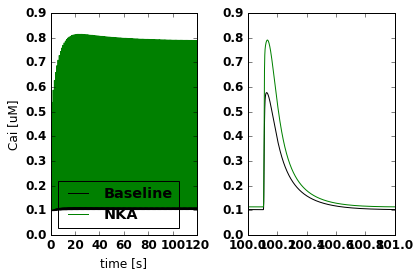

In [88]:
states = ["Cai"]
for i,state in enumerate(states):
        PlotPickleData(caseWT.data,data2=caseNKA50.data,idxName=state, 
                          ylabel=state,trange=[100e3,101e3],
                          case1legend="Baseline",
                          case2legend="NKA")

In [89]:
caseNKA40 = empty()
caseNKA40.caseName = "mouse_leak1p40x_nka1p40_freq1p0_dc_cat" 
caseNKA40.fileName = caseNKA40.caseName+".pickle"
caseNKA40.data = ao.readPickle(caseNKA40.fileName) 

Reading mouse_leak1p40x_nka1p40_freq1p0_dc_cat.pickle


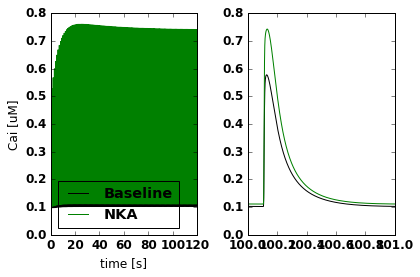

In [90]:
states = ["Cai"]
for i,state in enumerate(states):
        PlotPickleData(caseWT.data,data2=caseNKA40.data,idxName=state, 
                          ylabel=state,trange=[100e3,101e3],
                          case1legend="Baseline",
                          case2legend="NKA")

In [91]:
caseLeak40 = empty()
caseLeak40.caseName = "mouse_leak1p40x_nka1p00_freq1p0_dc_cat" 
caseLeak40.fileName = caseLeak40.caseName+".pickle"
caseLeak40.data = ao.readPickle(caseLeak40.fileName) 

Reading mouse_leak1p40x_nka1p00_freq1p0_dc_cat.pickle


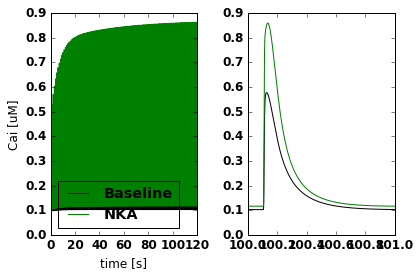

In [110]:
states = ["Cai"]
for i,state in enumerate(states):
        PlotPickleData(caseWT.data,data2=caseLeak.data,idxName=state, 
                          ylabel=state,trange=[100e3,101e3],
                          case1legend="Baseline",
                          case2legend="NKA")

In [369]:
caseAmylinExp = empty()
caseAmylinExp.caseName = "mouse_leak1p425_nka1p00_freq1p0_dc_cat" 
caseAmylinExp.fileName = caseAmylinExp.caseName+".pickle"
caseAmylinExp.data = ao.readPickle(caseAmylinExp.fileName) 

Reading mouse_leak1p425_nka1p00_freq1p0_dc_cat.pickle


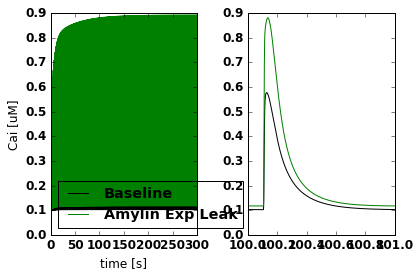

In [116]:
states = ["Cai"]
for i,state in enumerate(states):
        PlotPickleData(caseWT.data,data2=caseAmylinExp.data,idxName=state, 
                          ylabel=state,trange=[100e3,101e3],
                          case1legend="Baseline",
                          case2legend="Amylin Exp Leak")

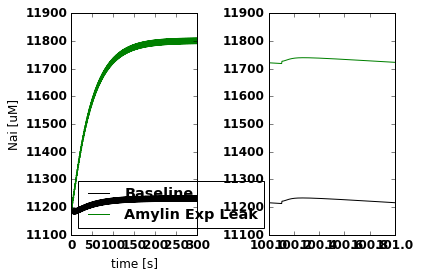

In [117]:
states = ["Nai"]
for i,state in enumerate(states):
        PlotPickleData(caseWT.data,data2=caseAmylinExp.data,idxName=state, 
                          ylabel=state,trange=[100e3,101e3],
                          case1legend="Baseline",
                          case2legend="Amylin Exp Leak")

In [370]:
caseNKA = empty()
caseNKA.caseName = "mouse_leak1p425_nka1p20_freq1p0_dc_cat" 
caseNKA.fileName = caseNKA.caseName+".pickle"
caseNKA.data = ao.readPickle(caseNKA.fileName) 

Reading mouse_leak1p425_nka1p20_freq1p0_dc_cat.pickle


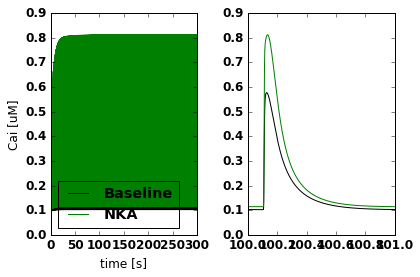

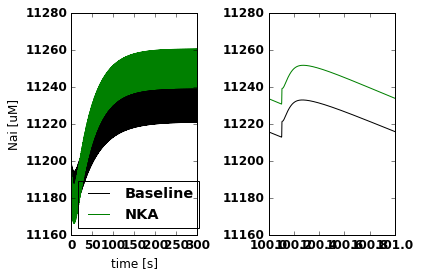

In [124]:
states = ["Cai","Nai"]
for i,state in enumerate(states):
        PlotPickleData(caseWT.data,data2=caseNKA.data,idxName=state, 
                          ylabel=state,trange=[100e3,101e3],
                          case1legend="Baseline",
                          case2legend="NKA")

In [229]:
caseNKA = empty()
caseNKA.caseName = "mouse_leak1p425_nka1p21_freq1p0_dc_cat" 
caseNKA.fileName = caseNKA.caseName+".pickle"
caseNKA.data = ao.readPickle(caseNKA.fileName) 

Reading mouse_leak1p425_nka1p21_freq1p0_dc_cat.pickle


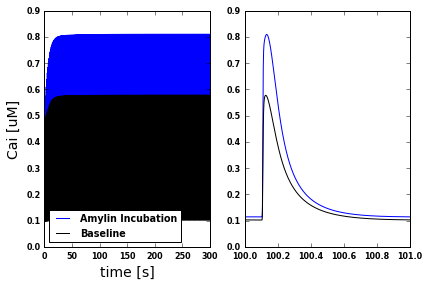

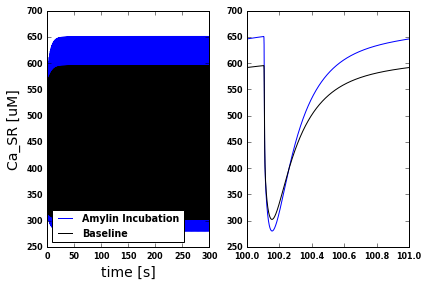

In [214]:
states = ["Cai","Ca_SR"]
for i,state in enumerate(states):
        PlotPickleData(caseNKA.data,data2=caseWT.data,idxName=state, 
                          ylabel=state,trange=[100e3,101e3],
                          case1legend="Amylin Incubation",
                          case2legend="Baseline")
        outFile="amylinNew_vs_baseline_%s.png"%state
        plt.gcf().savefig(outFile,bbox_extra_Artists=(),bbox_inches='tight',dpi=300)

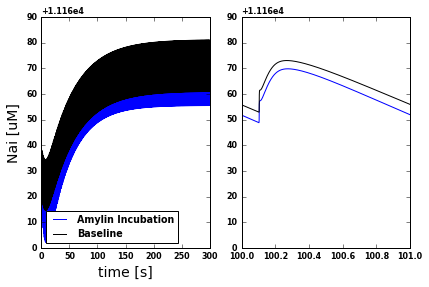

In [230]:
states = ["Nai"]
for i,state in enumerate(states):
        PlotPickleData(caseNKA.data,data2=caseWT.data,idxName=state, 
                          ylabel=state,trange=[100e3,101e3],
                          case1legend="Amylin Incubation",
                          case2legend="Baseline")
        outFile="amylinNew_vs_baseline_%s.png"%state
        plt.gcf().savefig(outFile,bbox_extra_Artists=(),bbox_inches='tight',dpi=300)

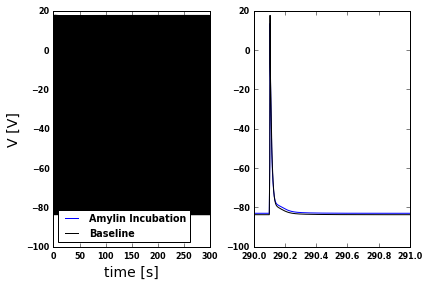

In [374]:
states = ["V"]
for i,state in enumerate(states):
        PlotPickleData(caseNKA.data,data2=caseWT.data,idxName=state, 
                          ylabel=state,trange=[290e3,291e3],
                          case1legend="Amylin Incubation",
                          case2legend="Baseline")
        outFile="amylinNew_vs_baseline_%s.png"%state
        plt.gcf().savefig(outFile,bbox_extra_Artists=(),bbox_inches='tight',dpi=300)

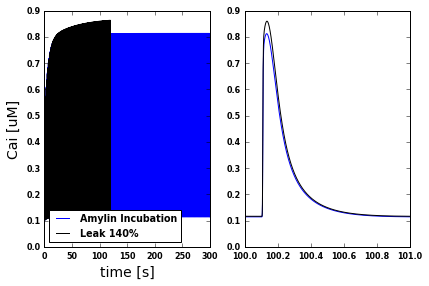

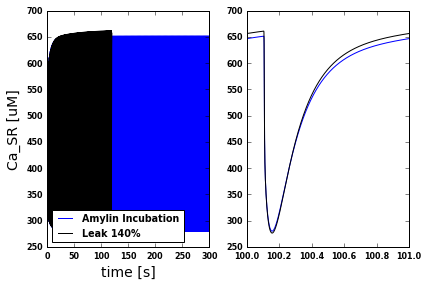

In [471]:
states = ["Cai","Ca_SR"]
for i,state in enumerate(states):
        PlotPickleData(caseNKA.data,data2=caseLeak140.data,idxName=state, 
                          ylabel=state,trange=[100e3,101e3],
                          case1legend="Amylin Incubation",
                          case2legend="Leak 140%")
        #outFile="amylinNew_vs_baseline_%s.png"%state
        plt.gcf().savefig(outFile,bbox_extra_Artists=(),bbox_inches='tight',dpi=300)

In [234]:
caseHIP = empty()
caseHIP.caseName = "mouse_leak1p425_nka1p21_hip0p50_freq1p0_dc_cat" 
caseHIP.fileName = caseHIP.caseName+".pickle"
caseHIP.data = ao.readPickle(caseHIP.fileName) 

Reading mouse_leak1p425_nka1p21_hip0p50_freq1p0_dc_cat.pickle


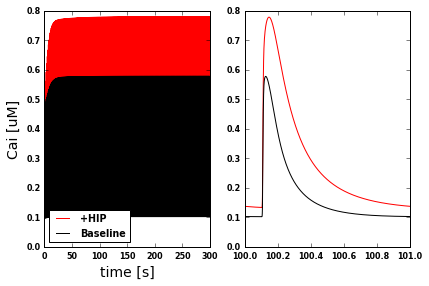

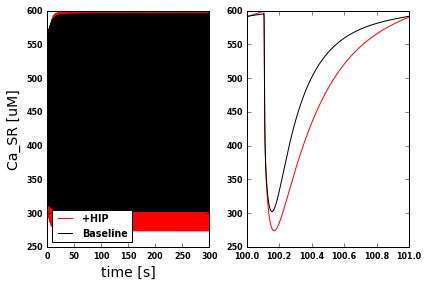

In [256]:
states = ["Cai","Ca_SR"]
for i,state in enumerate(states):
        PlotPickleData(caseHIP.data,data2=caseWT.data,idxName=state, 
                          ylabel=state,trange=[100e3,101e3],
                          case1legend="+HIP",
                          case2legend="Baseline")
        outFile="hipNew_vs_baseline_%s.png"%state
        plt.gcf().savefig(outFile,bbox_extra_Artists=(),bbox_inches='tight',dpi=300)

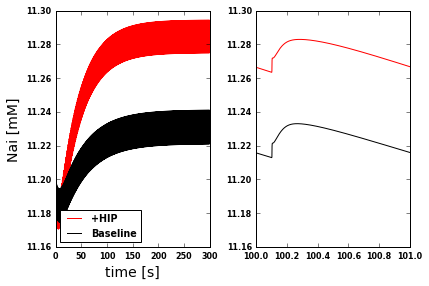

In [258]:
states = ["Nai"]
for i,state in enumerate(states):
        PlotPickleData(caseHIP.data,data2=caseWT.data,idxName=state, 
                          ylabel=state,trange=[100e3,101e3],
                          case1legend="+HIP",
                          case2legend="Baseline")
        outFile="hipNew_vs_baseline_%s.png"%state
        plt.gcf().savefig(outFile,bbox_extra_Artists=(),bbox_inches='tight',dpi=300)

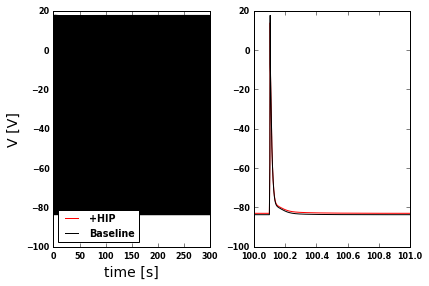

In [372]:
states = ["V"]
for i,state in enumerate(states):
        PlotPickleData(caseHIP.data,data2=caseWT.data,idxName=state, 
                          ylabel=state,trange=[100e3,101e3],
                          case1legend="+HIP",
                          case2legend="Baseline")
        outFile="hipNew_vs_baseline_%s.png"%state
        plt.gcf().savefig(outFile,bbox_extra_Artists=(),bbox_inches='tight',dpi=300)

In [424]:
def Plot3PickleData(data1,data2=None,data3=None,idxName="V",ylabel="V (mV)",trange=None,
    case1legend = None, case2legend=None, case3legend=None, 
    ):

  #  idx1=runner.model.state_indices(idxName)     
  # fluxes
  ms_to_s = 1e-3
  mM_to_uM = 1e-3
  class empty:pass

  def mycont(data):
    datac = empty()
    datac.t = data['t'] * ms_to_s
    datac.s = data['s'] / mM_to_uM
    datac.s_idx = data['s_idx']
    datac.j = data['j']
    datac.j_idx = data['j_idx']

    if idxName in datac.j_idx:
      datac.v = datac.j
      datac.v_idx = datac.j_idx
    # states 
    elif idxName in datac.s_idx:
      datac.v = datac.s
      datac.v_idx = datac.s_idx
    else:
      print idxName, " not found"
      datac.v =None

    return datac

  datac1 = mycont(data1)
  if data2!=None:
    datac2 = mycont(data2)
  if data3!=None:
    datac3 = mycont(data3)

  fig = plt.figure()

  if trange==None:
    fig.add_subplot(111)

  else:
    trange = np.asarray(trange)
    plt.subplot(1,2,2)
    if datac1.v !=None:
      idx1 = datac1.v_idx.index(idxName)
      plt.plot(datac1.t,datac1.v[:,idx1],'k',label=case1legend)
    if data2!=None and datac2.v !=None:
      idx2 = datac2.v_idx.index(idxName)
      plt.plot(datac2.t,datac2.v[:,idx2],'b',label=case2legend)
    if data3!=None and datac3.v !=None:
      idx3 = datac3.v_idx.index(idxName)
      plt.plot(datac3.t,datac3.v[:,idx3],'r',label=case3legend)
    plt.xlim(trange*ms_to_s)
#    plt.ylim(250,650)
    pyplot.locator_params(nbins=5)
    plt.legend(loc=0)
#    plt.ylim(0.10,0.75)
#    plt.ylim(10.5,11.5)
#    plt.ylim(0.0,0.16)
#    plt.subplot(1,2,1)

#  if datac1.v !=None:
#    idx1 = datac1.v_idx.index(idxName)
#    plt.plot(datac1.t,datac1.v[:,idx1],'k',label=case1legend)
#  if data2!=None and datac2.v !=None:
#    idx2 = datac2.v_idx.index(idxName)
#    plt.plot(datac2.t,datac2.v[:,idx2],'r',label=case2legend)
#  if data3!=None and datac3.v !=None:
#    idx3 = datac3.v_idx.index(idxName)
#    plt.plot(datac3.t,datac3.v[:,idx3],'b',label=case3legend)
  plt.xlabel('time [s]', weight="bold",fontsize=14)
  plt.ylabel(ylabel+" [uM]", weight="bold",fontsize=14)
#  plt.ylabel(ylabel+" [mM]", weight="bold",fontsize=14)
#  plt.legend(loc=3)
  plt.tight_layout()

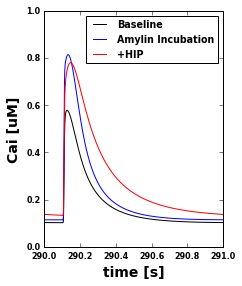

In [427]:
states = ["Cai"]
for i,state in enumerate(states):
        Plot3PickleData(caseWT.data,data2=caseNKA.data,data3=caseHIP.data,idxName=state, 
                          ylabel=state,trange=[290e3,291e3],
                          case1legend="Baseline",
                          case2legend="Amylin Incubation",
                          case3legend="+HIP")
        outFile="compare_%s.png"%state
        plt.gcf().savefig(outFile,bbox_extra_Artists=(),bbox_inches='tight',dpi=300)

In [333]:
idxName = "i_Cab"
if sname in caseNKA.data["j_idx"]:
    print 1
    
if sname in caseWT.data["j_idx"]:
    print 1    
    
datac1 = empty()
datac1.v_idx = caseNKA.data["j_idx"]
datac1.v = caseNKA.data["j"]
idx1 = datac1.v_idx.index(idxName)    
print idx1

datac1.j_idx = caseWT.data['j_idx']
len(datac1.j_idx)
np.shape(datac1.v)

1
1
94


(300015, 43)

In [344]:
caseDC = empty()
caseDC.caseName = "test_daisychain_cat" 
caseDC.fileName = caseDC.caseName+".pickle"
caseDC.data = ao.readPickle(caseDC.fileName) 

Reading test_daisychain_cat.pickle


In [363]:
idxName = "i_Cab"
if sname in caseDC.data["j_idx"]:
    print 1
    
if sname in caseDC.data["j_idx"]:
    print 1    

print "j_idx: ",np.shape(caseDC.data["j_idx"]) 
print "j_idx: ",np.shape(caseDC.data["j"]) 
datac1 = empty()
datac1.v_idx = caseDC.data["j_idx"]
datac1.v = caseDC.data["j"]
idx1 = datac1.v_idx.index(idxName)    
print idx1
print np.shape(datac1.v)

datac1.j_idx = caseDC.data['j_idx']
len(datac1.j_idx)
np.shape(datac1.v)
#print len(datac1.j_idx)

1
1
j_idx:  (139,)
j_idx:  (4002, 43)
94
(4002, 43)


(4002, 43)

In [353]:
caseRS = empty()
caseRS.caseName = "test_runShannon" 
caseRS.fileName = caseRS.caseName+".pickle"
caseRS.data = ao.readPickle(caseRS.fileName) 

Reading test_runShannon.pickle


In [366]:
idxName = "i_Cab"
if sname in caseRS.data["j_idx"]:
    print 1
    
if sname in caseRS.data["j_idx"]:
    print 1    

print "j_idx: ",np.shape(caseRS.data["j_idx"]) 
print "j_idx: ",np.shape(caseRS.data["j"])     
datac1 = empty()
datac1.v_idx = caseRS.data["j_idx"]
datac1.v = caseRS.data["j"]
idx1 = datac1.v_idx.index(idxName)    
print idx1
print np.shape(datac1.v)

datac1.j_idx = caseRS.data['j_idx']
len(datac1.j_idx)
np.shape(datac1.v)
print len(datac1.j_idx)

 1
1
j_idx:  (139,)
j_idx:  (300001, 139)
94
(300001, 139)
139


IndexError: index 94 is out of bounds for axis 1 with size 43

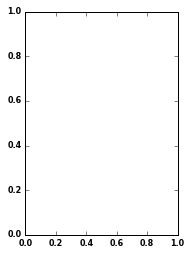

In [377]:
states = ["i_Cab"]
for i,state in enumerate(states):
        PlotPickleData(caseNKA.data,data2=caseWT.data,idxName=state, 
                          ylabel=state,trange=[100e3,101e3],
                          case1legend="Amylin Incubation",
                          case2legend="Baseline")
        #outFile="amylinNew_vs_baseline_%s.png"%state
        #plt.gcf().savefig(outFile,bbox_extra_Artists=(),bbox_inches='tight',dpi=300)

In [253]:
print caseNKA.data['j_idx']

['Vol_Cell', 'Vol_SR', 'Vol_SL', 'Vol_jct1', 'Vol_myo', 'E_Na_jct1', 'E_Na_SL', 'E_Ca_jct1', 'E_Ca_SL', 'E_K', 'E_Cl', 'openProb', 'i_Na_jct1', 'i_Na_SL', 'i_Na', 'alpha_h', 'beta_h', 'alpha_j', 'beta_j', 'alpha_m', 'beta_m', 'i_Nab_jct1', 'i_Nab_SL', 'i_Nab', 'sigma', 'f_NaK', 'i_NaK_jct1', 'i_NaK_SL', 'i_NaK', 'Xr_infinity', 'tau_Xr', 'Rr', 'pCa_jct1', 'pCa_SL', 'G_Ks_jct1', 'G_Ks_SL', 'E_Ks', 'i_Ks_jct1', 'i_Ks_SL', 'i_Ks', 'Xs_infinity', 'tau_Xs', 'X_Kur_slowss', 'tau_Xkur', 'Y_Kur_slowss', 'tau_Ykur1', 'tau_Ykur2', 'i_Kur_PKAp', 'a_Kur', 'fIKuravail', 'i_kur1', 'i_kur2', 'i_kur', 'xssss', 'tauxss', 'i_ss', 'i_Kp', 'i_tos', 'X_tos_infinity', 'tau_X_tos', 'Y_tos_infinity', 'tau_Y_tos', 'R_tos_infinity', 'tau_R_tos', 'i_tof', 'X_tof_infinity', 'tau_X_tof', 'Y_tof_infinity', 'tau_Y_tof', 'alpha_K1', 'beta_K1', 'K1_infinity', 'i_Cl_Ca', 'i_Clb', 'd_infinity', 'tau_d', 'f_infinity', 'tau_f', 'fCa_SL', 'fCa_jct1', 'temp_jct1', 'temp_SL', 'Q_NCX', 'Ka_SL', 'Ka_jct1', 'i_NaCa_jct1', 'i_NaC

In [518]:
def Plot4PickleDataNKA(data1,data2=None,data3=None,data4=None,idxName="V",ylabel="V (mV)",trange=None,
    case1legend = None, case2legend=None, case3legend=None, case4legend=None,
    ):

  #  idx1=runner.model.state_indices(idxName)     
  # fluxes
  ms_to_s = 1e-3
  mM_to_uM = 1e-3
  class empty:pass

  def mycont(data):
    datac = empty()
    datac.t = data['t'] * ms_to_s
    datac.s = data['s'] / mM_to_uM
    datac.s_idx = data['s_idx']
    datac.j = data['j']
    datac.j_idx = data['j_idx']

    if idxName in datac.j_idx:
      datac.v = datac.j
      datac.v_idx = datac.j_idx
    # states 
    elif idxName in datac.s_idx:
      datac.v = datac.s
      datac.v_idx = datac.s_idx
    else:
      print idxName, " not found"
      datac.v =None

    return datac

  datac1 = mycont(data1)
  if data2!=None:
    datac2 = mycont(data2)
  if data3!=None:
    datac3 = mycont(data3)
  if data4!=None:
    datac4 = mycont(data4)


  fig = plt.figure()

  if trange==None:
    fig.add_subplot(111)

  else:
    trange = np.asarray(trange)
    plt.subplot(1,2,2)
    if datac1.v !=None:
      idx1 = datac1.v_idx.index(idxName)
      plt.plot(datac1.t,datac1.v[:,idx1],'k',label=case1legend)
    if data2!=None and datac2.v !=None:
      idx2 = datac2.v_idx.index(idxName)
      plt.plot(datac2.t,datac2.v[:,idx2],'k--',label=case2legend)
    if data3!=None and datac3.v !=None:
      idx3 = datac3.v_idx.index(idxName)
      plt.plot(datac3.t,datac3.v[:,idx3],'b',label=case3legend)
    if data4!=None and datac4.v !=None:
      idx4 = datac4.v_idx.index(idxName)
    plt.plot(datac4.t,datac4.v[:,idx4],'b--',label=case4legend)
    plt.xlim(trange*ms_to_s)
#    plt.ylim(250,650)
    pyplot.locator_params(nbins=5)
    #plt.legend(loc=0)
    #legend = plt.legend(loc=3) #Nai
    legend=plt.legend(bbox_to_anchor=(1.35,1.0),fancybox=False, shadow=False) #Cai
    legend.get_frame().set_facecolor('white')
    plt.ylim(0.1,0.9)  #Cai
#    plt.ylim(10.0,12.0) #Nai
#    plt.ylim(0.0,0.16)
#    plt.subplot(1,2,1)

#  if datac1.v !=None:
#    idx1 = datac1.v_idx.index(idxName)
#    plt.plot(datac1.t,datac1.v[:,idx1],'k',label=case1legend)
#  if data2!=None and datac2.v !=None:
#    idx2 = datac2.v_idx.index(idxName)
#    plt.plot(datac2.t,datac2.v[:,idx2],'r',label=case2legend)
#  if data3!=None and datac3.v !=None:
#    idx3 = datac3.v_idx.index(idxName)
#    plt.plot(datac3.t,datac3.v[:,idx3],'b',label=case3legend)
  plt.xlabel('time [s]', weight="bold",fontsize=14)
  plt.ylabel(ylabel+" [uM]", weight="bold",fontsize=14) #Cai
#  plt.ylabel(ylabel+" [mM]", weight="bold",fontsize=14) #Nai
#  plt.legend(loc=3)
  plt.tight_layout()

In [295]:
caseNKA_ctl = empty()
caseNKA_ctl.caseName = "mouse_leak1p00_nka1p21_freq1p0_dc_cat" 
caseNKA_ctl.fileName = caseNKA_ctl.caseName+".pickle"
caseNKA_ctl.data = ao.readPickle(caseNKA_ctl.fileName) 

Reading mouse_leak1p00_nka1p21_freq1p0_dc_cat.pickle


In [294]:
caseAmylin = empty()
caseAmylin.caseName = "mouse_leak1p425_nka1p00_freq1p0_dc_cat" 
caseAmylin.fileName = caseAmylin.caseName+".pickle"
caseAmylin.data = ao.readPickle(caseAmylin.fileName) 

Reading mouse_leak1p425_nka1p00_freq1p0_dc_cat.pickle


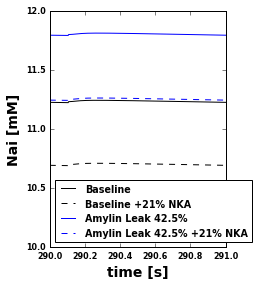

In [513]:
states = ["Nai"]
for i,state in enumerate(states):
        Plot4PickleDataNKA(caseWT.data,data2=caseNKA_ctl.data,data3=caseAmylin.data,data4=caseNKA.data,
                          idxName=state, 
                          ylabel=state,trange=[290e3,291e3],
                          case1legend="Baseline",
                          case2legend="Baseline +21% NKA",
                          case3legend="Amylin Leak 42.5%",
                          case4legend="Amylin Leak 42.5% +21% NKA")
 #       plt.legend(bbox_to_anchor=(1.5,1.0),fancybox=True, shadow=True)
        plt.tight_layout()
        outFile="NKA_Nai.png"
        plt.gcf().savefig(outFile,bbox_extra_Artists=(),bbox_inches='tight',dpi=300)

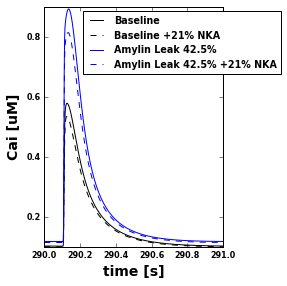

In [519]:
states = ["Cai"]
for i,state in enumerate(states):
        Plot4PickleDataNKA(caseWT.data,data2=caseNKA_ctl.data,data3=caseAmylin.data,data4=caseNKA.data,
                          idxName=state, 
                          ylabel=state,trange=[290e3,291e3],
                          case1legend="Baseline",
                          case2legend="Baseline +21% NKA",
                          case3legend="Amylin Leak 42.5%",
                          case4legend="Amylin Leak 42.5% +21% NKA")
    #    plt.legend(bbox_to_anchor=(1.5,1.0),fancybox=True, shadow=True)
        plt.tight_layout()
        outFile="NKA_Cai.png"
        plt.gcf().savefig(outFile,bbox_extra_Artists=(),bbox_inches='tight',dpi=300)

IndexError: index 94 is out of bounds for axis 1 with size 43

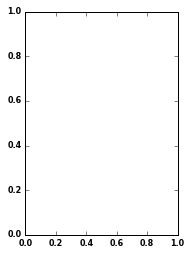

In [239]:

        
#root="/net/share/shared/papers/despa/"
states = ["i_Cab","i_NaCa"]
for i,state in enumerate(states):
        PlotPickleData(caseWT.data,data2=caseNKA.data, #data3=caseHIP.data,
                        idxName=state, 
                        ylabel=state,trange=[100.0e3,100.8e3],
                        case1legend="Baseline",
                        case2legend="+Amylin",
                       #   case3legend="+HIP",
                          )
       # plt.legend(bbox_to_anchor=(1.2,1.0),fancybox=True, shadow=True)
        plt.tight_layout()
        outFile="comp_%s.png"%state
   #     plt.gcf().savefig(outFile,bbox_extra_Artists=(),bbox_inches='tight',dpi=300)

In [379]:
import downSamplePickles
#root = "/home/AD/cesc235/wholecell_new3/asdf/wholecell/"
files = ["mouse_leak1p00x_nka1p00_freq1p0_dc_cat.pickle",\
         "mouse_leak1p425_nka1p21_freq1p0_dc_cat.pickle",\
         "mouse_leak1p425_nka1p21_hip0p50_freq1p0_dc_cat.pickle"]
#reducedFiles = [ x.replace(".pickle","_red.pickle") for x in files]

if 0:
    for i,file in enumerate(files):
        fileName = file
        print fileName
        downSamplePickles.downsample(fileName,10)

#print reducedFiles
print files

['mouse_leak1p00x_nka1p00_freq1p0_dc_cat.pickle', 'mouse_leak1p425_nka1p21_freq1p0_dc_cat.pickle', 'mouse_leak1p425_nka1p21_hip0p50_freq1p0_dc_cat.pickle']


In [380]:
cases['baseline'] = Case.Case(tag="Baseline",label="Baseline")
cases['baseline'].name = files[0]
cases['amylin'] = Case.Case(tag="Amylin Incubation",label="Amylin Incubation")
cases['amylin'].name = files[1]
cases['hip'] = Case.Case(tag="+HIP",label="+HIP")
cases['hip'].name = files[2]

In [381]:
ao.LoadPickles(cases,noOverwrite=True)

#  hip
Loading  mouse_leak1p425_nka1p21_hip0p50_freq1p0_dc_cat.pickle
Reading mouse_leak1p425_nka1p21_hip0p50_freq1p0_dc_cat.pickle
#  amylin
Loading  mouse_leak1p425_nka1p21_freq1p0_dc_cat.pickle
Reading mouse_leak1p425_nka1p21_freq1p0_dc_cat.pickle
#  baseline
Loading  mouse_leak1p00x_nka1p00_freq1p0_dc_cat.pickle
Reading mouse_leak1p00x_nka1p00_freq1p0_dc_cat.pickle


In [382]:
ignoreList = cases['baseline'].data['j_idx']
ignoreList = [s for s in ignoreList if "i_" not in s and "j_" not in s]
print ignoreList

['Vol_Cell', 'Vol_SR', 'Vol_SL', 'Vol_jct1', 'Vol_myo', 'E_Na_jct1', 'E_Na_SL', 'E_Ca_jct1', 'E_Ca_SL', 'E_K', 'E_Cl', 'openProb', 'alpha_h', 'beta_h', 'alpha_j', 'beta_j', 'alpha_m', 'beta_m', 'sigma', 'f_NaK', 'Xr_infinity', 'tau_Xr', 'Rr', 'pCa_jct1', 'pCa_SL', 'G_Ks_jct1', 'G_Ks_SL', 'E_Ks', 'Xs_infinity', 'tau_Xs', 'X_Kur_slowss', 'tau_Xkur', 'Y_Kur_slowss', 'tau_Ykur1', 'tau_Ykur2', 'a_Kur', 'fIKuravail', 'xssss', 'tauxss', 'X_tos_infinity', 'tau_X_tos', 'Y_tos_infinity', 'tau_Y_tos', 'R_tos_infinity', 'tau_R_tos', 'X_tof_infinity', 'tau_X_tof', 'Y_tof_infinity', 'tau_Y_tof', 'alpha_K1', 'beta_K1', 'K1_infinity', 'd_infinity', 'tau_d', 'f_infinity', 'tau_f', 'fCa_SL', 'fCa_jct1', 'temp_jct1', 'temp_SL', 'Q_NCX', 'Ka_SL', 'Ka_jct1', 'Q_SLCaP', 'kCaSR', 'koSRCa', 'kiSRCa', 'RI', 'Q_SRCaP', 'J_Na_jct1_SL', 'J_Na_SL_myo', 'J_Ca_jct1_SL', 'J_Ca_SL_myo', 'dCa_TroponinC', 'dCa_TroponinC_Ca_Mg', 'dMg_TroponinC_Ca_Mg', 'dCa_Calmodulin', 'dCa_Myosin', 'dMg_Myosin', 'dCa_SRB', 'dCa_cytosol_

In [383]:
print cases['baseline'].data['j_idx']

['Vol_Cell', 'Vol_SR', 'Vol_SL', 'Vol_jct1', 'Vol_myo', 'E_Na_jct1', 'E_Na_SL', 'E_Ca_jct1', 'E_Ca_SL', 'E_K', 'E_Cl', 'openProb', 'i_Na_jct1', 'i_Na_SL', 'i_Na', 'alpha_h', 'beta_h', 'alpha_j', 'beta_j', 'alpha_m', 'beta_m', 'i_Nab_jct1', 'i_Nab_SL', 'i_Nab', 'sigma', 'f_NaK', 'i_NaK_jct1', 'i_NaK_SL', 'i_NaK', 'Xr_infinity', 'tau_Xr', 'Rr', 'pCa_jct1', 'pCa_SL', 'G_Ks_jct1', 'G_Ks_SL', 'E_Ks', 'i_Ks_jct1', 'i_Ks_SL', 'i_Ks', 'Xs_infinity', 'tau_Xs', 'X_Kur_slowss', 'tau_Xkur', 'Y_Kur_slowss', 'tau_Ykur1', 'tau_Ykur2', 'i_Kur_PKAp', 'a_Kur', 'fIKuravail', 'i_kur1', 'i_kur2', 'i_kur', 'xssss', 'tauxss', 'i_ss', 'i_Kp', 'i_tos', 'X_tos_infinity', 'tau_X_tos', 'Y_tos_infinity', 'tau_Y_tos', 'R_tos_infinity', 'tau_R_tos', 'i_tof', 'X_tof_infinity', 'tau_X_tof', 'Y_tof_infinity', 'tau_Y_tof', 'alpha_K1', 'beta_K1', 'K1_infinity', 'i_Cl_Ca', 'i_Clb', 'd_infinity', 'tau_d', 'f_infinity', 'tau_f', 'fCa_SL', 'fCa_jct1', 'temp_jct1', 'temp_SL', 'Q_NCX', 'Ka_SL', 'Ka_jct1', 'i_NaCa_jct1', 'i_NaC

In [384]:
ignoreList = ['Vol_Cell', 'Vol_SR', 'Vol_SL', 'Vol_jct1', 'Vol_myo', 'E_Na_jct1', 'E_Na_SL', 'E_Ca_jct1', 'E_Ca_SL', \
              'E_K', 'E_Cl', 'openProb', 'alpha_h', 'beta_h', 'alpha_j', 'beta_j', 'alpha_m', 'beta_m', 'sigma', 'f_NaK',\
              'Xr_infinity', 'tau_Xr', 'Rr', 'pCa_jct1', 'pCa_SL', 'G_Ks_jct1', 'G_Ks_SL', 'E_Ks', 'Xs_infinity', \
              'tau_Xs', 'X_Kur_slowss', 'tau_Xkur', 'Y_Kur_slowss', 'tau_Ykur1', 'tau_Ykur2', 'a_Kur', 'fIKuravail',\
              'xssss', 'tauxss', 'X_tos_infinity', 'tau_X_tos', 'Y_tos_infinity', 'tau_Y_tos', 'R_tos_infinity', \
              'tau_R_tos', 'X_tof_infinity', 'tau_X_tof', 'Y_tof_infinity', 'tau_Y_tof', 'alpha_K1', 'beta_K1',\
              'K1_infinity', 'd_infinity', 'tau_d', 'f_infinity', 'tau_f', 'fCa_SL', 'fCa_jct1', 'temp_jct1', 'temp_SL',\
              'Q_NCX', 'Ka_SL', 'Ka_jct1', 'Q_SLCaP', 'kCaSR', 'koSRCa', 'kiSRCa', 'RI', \
              'Q_SRCaP', 'j_pump_SR', 'J_Na_jct1_SL', 'J_Na_SL_myo', 'J_Ca_jct1_SL', 'J_Ca_SL_myo', 'dCa_TroponinC',\
              'dCa_TroponinC_Ca_Mg', 'dMg_TroponinC_Ca_Mg', 'dCa_Calmodulin', 'dCa_Myosin', 'dMg_Myosin', 'dCa_SRB',\
              'dCa_cytosol_tot_bound', 'G_IKr', 'G_K1', 'Q_CaL', 'temp', 'dNa_jct1_buf', 'dNa_SL_buf', 'dCalsequestrin',\
              'dCa_SLB_SL', 'dCa_SLB_jct1', 'dCa_SLHigh_SL', 'dCa_SLHigh_jct1', 'dCa_jct1_tot_bound', 'dCa_SL_tot_bound',\
              'i_Na_SL', 'i_Na_jct1','i_Nab_SL', 'i_Nab_jct1','i_Cab_SL', 'i_Cab_jct1','i_Cap_SL', 'i_Cap_jct1',\
              'i_NaCa_SL', 'i_NaCa_jct1','i_Ca_SL_tot','i_Ca_jct1_tot','i_NaK_SL', 'i_NaK_jct1','i_CaL_Ca_SL', \
              'i_CaL_Ca_jct1','i_CaL_Na_SL', 'i_CaL_Na_jct1']

In [390]:
def StateDecompositionAnalysisHIP(caseDict, \
                  wanted1="baseline",wanted2="incrleak",
                  indSS=[2e3,-1], # Time aftter which data is used for comparative analysis. -1 signifies getting last time step  [ms]
                  xlim=None,
                  root="./",
                  ranked=20,
                  ignoreList = ["dNa_SL_buf"],
                  mode="states" # fluxes
                 ):

  # we want to compare only two of the cases, so select these here    
  #wanted =["baseline1Hz","baseline0.25Hz"]# ,"2xincrleak0.25Hz"]
  #wanted =["baseline0.25Hz","2xincrleak0.25Hz"]
  subCaseDict = dict()
  wanted =[wanted1,wanted2]
  for idx, wantedi in enumerate(wanted):
    for key, case in caseDict.iteritems():
    #if key in wanted:
      if key == wantedi:
        print "Selecting ", key
        case.idx = idx
        subCaseDict[ case.tag ]  = case
        #print np.shape(case.data['s']) 

  # Load data 
  ao.LoadPickles(subCaseDict,noOverwrite=True)


  # decide on which data to pull
  if mode=="states":
    v_key = 's'
  elif mode=="fluxes":
    v_key = 'j'
  else:
    raise RuntimeError(mode +" not understood")


  # for two cases, perform psd analysis to obtain mean and PSD
  caseComp = [None,None]
  for key, case in subCaseDict.iteritems():
      print case.name
      t = case.data['t']

      v = case.data[v_key]

      #sub = s[1e4:5e4,0:10]
      #sub = s[1e4:5e4,]
      sub = v[indSS[0]:indSS[1]]
      case.dc, case.psd2 = ao.PSDAnaly(sub,verbose=False)
      caseComp[ case.idx ] = case

  ## displaycomparison
  cols = ["k","b"]
  # get shortest traj
  lastT = 1e30
  for key, case in subCaseDict.iteritems():
      ti = case.data['t']
      # pick whichever T is smallest: max length of either trajector or the xlim bound
      if xlim!=None:
        lastT = np.min([ti[-1],lastT,xlim[1]])
      else:
        lastT = np.min([ti[-1],lastT])
  if xlim==None:
    xlim = [0,lastT]

  def PlotValueComparison(label1):
    plt.figure()
    fig, ax1 = plt.subplots()
    i=0
    cols = ["k","b"]
    #ylims = [1e90,-1e90]
    for key, case in subCaseDict.iteritems():
      ti = case.data['t']

      vi = case.data[v_key]
      v_idx = case.data['%s_idx'%v_key]

      idx1 = v_idx.index(label1)

      ti_vals = ti[xlim[0]:xlim[1]]
      vi_vals = vi[xlim[0]:xlim[1],idx1]
      ax1.plot(ti_vals,vi_vals,cols[i]+"-",label = case.label)

      i+=1

    #ax1.set_ylim([0,1.5e-3])
    ax1.set_xlim(xlim)
    #plt.title("Action potential") 
    ax1.set_ylabel("%s [unk]"%label1)
    plt.legend()
    plt.gcf().savefig(root+"%s_%s_%s_%s.png"%(mode,label1,wanted1,wanted2),dpi=300)




  ## Quantify (pct error) change in mean value of each state
  # normalize by case 1
  def donorm(subj,ref):
    eps = 1e-9
    nonZero = np.argwhere(np.abs(ref.dc)>eps)
    subj.dcn = np.zeros( np.shape(ref.dc) )
    subj.dcn[ nonZero ] = subj.dc[ nonZero ] / ref.dc[ nonZero ]
  #caseComp[0].dcn = caseComp[0].dc/caseComp[0].dc
  #caseComp[1].dcn = caseComp[1].dc/caseComp[0].dc
  donorm(caseComp[0],caseComp[0])
  donorm(caseComp[1],caseComp[0])
  valueChg = caseComp[1].dcn-caseComp[0].dcn
  sort_index = (np.argsort(np.abs(valueChg)))[::-1]


  #Assuming that both pickle files have same states/ode model. 
  v_idx = case.data['%s_idx'%v_key]
  value_inds = {key: idx for (idx, key) in enumerate(v_idx)}
  # create reverse lookup
  value_inds_rev = {idx: key for (idx, key) in enumerate(v_idx)}

  # grabbing top-twenty modulated states
  bestidx    = []
  bestvalues = []

  stored = 0
  for i,idx in enumerate(sort_index):
          if idx not in value_inds_rev:
              raise ValueError("Unknown state/flux: '{0}'".format(idx))

          if value_inds_rev[idx] in ignoreList:
            print "Skipping ", value_inds_rev[idx]
            continue

          print value_inds_rev[idx],"pct %4.2f"%valueChg[idx], \
                                      "0 %4.1e/%4.1e"% (caseComp[0].dc[idx],caseComp[0].dcn[idx]),\
                                      "1 %4.1e/%4.1e"% (caseComp[1].dc[idx],caseComp[1].dcn[idx])
          bestidx.append(idx)
          bestvalues.append(value_inds_rev[idx])
          #print beststates[i]
          #indices.append(state_inds[state])

          stored+=1
          if stored>=ranked:
            break
  ## Plot State Data 
  if mode == "states":
    plotValues = ["V","Cai","Ca_SR"] + bestvalues
  elif mode =="fluxes":
    plotValues = ["i_Cab"] + bestvalues

  #
  #for label in plotValues:
  #  PlotValueComparison(label)


  ## Plot comparative data 
  width=0.3
  plt.figure()
  fig, ax = plt.subplots()
  ind = np.arange(ranked)

  dc0s = caseComp[0].dcn
  rects1 = ax.bar(ind, dc0s[bestidx], width,color='k')

  dc1s = caseComp[1].dcn
  rects2 = ax.bar(ind+width, dc1s[bestidx], width,color='r')

  ax.set_xticks(ind+width)
  ax.set_xticklabels( bestvalues,rotation=90 )


  lb1 =caseComp[0].label
  lb2= caseComp[1].label
  plt.title("%s vs %s" % (lb1,lb2))
  ax.legend( (rects1[0], rects2[0]), (lb1,lb2),loc=0 )
  ax.set_ylabel("fold chg wrt WT")
  plt.tight_layout()


  #plt.gcf().savefig(root+versionPrefix+"comparative.png",dpi=300)
#  plt.gcf().savefig(root+"comparative_%s_%s_%s.png"%(mode,wanted1,wanted2),dpi=300)
        

Selecting  baseline
Selecting  hip
#  +HIP
Loading  mouse_leak1p425_nka1p21_hip0p50_freq1p0_dc_cat.pickle
Skipping read, since already populated
#  Baseline
Loading  mouse_leak1p00x_nka1p00_freq1p0_dc_cat.pickle
Skipping read, since already populated
mouse_leak1p425_nka1p21_hip0p50_freq1p0_dc_cat.pickle
mouse_leak1p00x_nka1p00_freq1p0_dc_cat.pickle
Skipping  dNa_SL_buf
Skipping  dNa_jct1_buf
Skipping  dCa_SL_tot_bound
Skipping  dCa_Myosin
Skipping  dMg_Myosin
Skipping  dCa_SLHigh_SL
Skipping  dCa_TroponinC
Skipping  dCa_SRB
Skipping  openProb
Skipping  dCa_SLB_SL
Skipping  i_Na_SL
i_Na pct 0.68 0 -1.6e-01/1.0e+00 1 -2.7e-01/1.7e+00
Skipping  i_Na_jct1
Skipping  dCalsequestrin
i_Kp pct -0.47 0 1.1e-06/1.0e+00 1 5.9e-07/5.3e-01
Skipping  i_Nab_SL
i_Nab pct 0.42 0 -2.0e-01/1.0e+00 1 -2.8e-01/1.4e+00
Skipping  i_Nab_jct1
Skipping  i_Cab_jct1
i_Cab pct 0.39 0 -1.4e-01/1.0e+00 1 -2.0e-01/1.4e+00
Skipping  i_Cab_SL
Skipping  dCa_SLB_jct1
Skipping  dCa_jct1_tot_bound
Skipping  dCa_cytosol_tot_

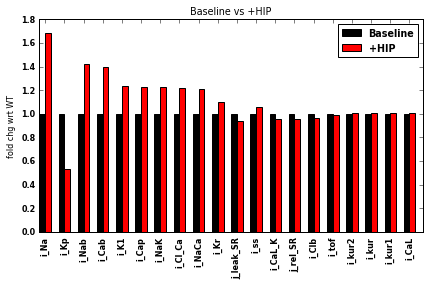

In [391]:
indSS = [5e3,15e3]
xlim = indSS
StateDecompositionAnalysisHIP(cases,wanted1="baseline",wanted2="hip",indSS=indSS,xlim=xlim,\
                              mode="fluxes",ranked=20,ignoreList=ignoreList)

Selecting  baseline
Selecting  amylin
#  Baseline
Loading  mouse_leak1p00x_nka1p00_freq1p0_dc_cat.pickle
Skipping read, since already populated
#  Amylin Incubation
Loading  mouse_leak1p425_nka1p21_freq1p0_dc_cat.pickle
Skipping read, since already populated
mouse_leak1p00x_nka1p00_freq1p0_dc_cat.pickle
mouse_leak1p425_nka1p21_freq1p0_dc_cat.pickle
Skipping  dCa_SL_tot_bound
Skipping  dCa_SLHigh_SL
Skipping  dNa_jct1_buf
Skipping  openProb
Skipping  dCa_SRB
Skipping  dCa_Myosin
Skipping  dMg_Myosin
Skipping  dCa_TroponinC
Skipping  dCa_SLB_SL
Skipping  dCalsequestrin
Skipping  i_Na_SL
i_Na pct 0.69 0 -1.6e-01/1.0e+00 1 -2.7e-01/1.7e+00
Skipping  dNa_SL_buf
Skipping  i_Na_jct1
i_Kp pct -0.49 0 1.1e-06/1.0e+00 1 5.8e-07/5.1e-01
Skipping  dCa_SLB_jct1
Skipping  dCa_jct1_tot_bound
Skipping  dCa_SLHigh_jct1
Skipping  i_Nab_SL
i_Nab pct 0.42 0 -2.0e-01/1.0e+00 1 -2.8e-01/1.4e+00
Skipping  i_Nab_jct1
Skipping  i_Cab_SL
i_Cab pct 0.40 0 -1.4e-01/1.0e+00 1 -2.0e-01/1.4e+00
Skipping  i_Cab_jct1


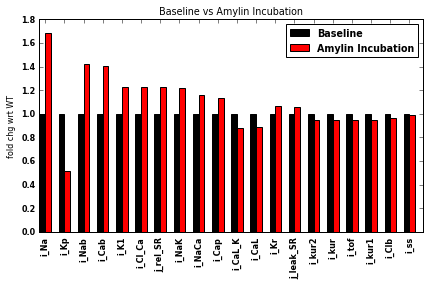

In [396]:
indSS = [5e3,15e3]
xlim = indSS
StateDecompositionAnalysisHIP(cases,wanted1="baseline",wanted2="amylin",indSS=indSS,xlim=xlim,\
                              mode="fluxes",ranked=20,ignoreList=ignoreList)

In [421]:
def StateDecompositionAnalysisThree(caseDict, \
                  wanted1="baseline",wanted2="incrleak",wanted3="incrleak2",
                  indSS=[2e3,-1], # Time aftter which data is used for comparative analysis. -1 signifies getting last time step  [ms]
                  xlim=None,
                  root="./",
                  ranked=20,
                  ignoreList = ["dNa_SL_buf"],
                  mode="states" # fluxes
                 ):

  # we want to compare only two of the cases, so select these here    
  #wanted =["baseline1Hz","baseline0.25Hz"]# ,"2xincrleak0.25Hz"]
  #wanted =["baseline0.25Hz","2xincrleak0.25Hz"]
  subCaseDict = dict()
  wanted =[wanted1,wanted2,wanted3]
  for idx, wantedi in enumerate(wanted):
    for key, case in caseDict.iteritems():
    #if key in wanted:
      if key == wantedi:
        print "Selecting ", key
        case.idx = idx
        subCaseDict[ case.tag ]  = case
        #print np.shape(case.data['s']) 

  # Load data 
  ao.LoadPickles(subCaseDict,noOverwrite=True)


  # decide on which data to pull
  if mode=="states":
    v_key = 's'
  elif mode=="fluxes":
    v_key = 'j'
  else:
    raise RuntimeError(mode +" not understood")


  # for two cases, perform psd analysis to obtain mean and PSD
  caseComp = [None,None,None]
  for key, case in subCaseDict.iteritems():
      print case.name
      t = case.data['t']

      v = case.data[v_key] #Print length here.

      #sub = s[1e4:5e4,0:10]
      #sub = s[1e4:5e4,]
      sub = v[indSS[0]:indSS[1]] #Get max value here.  Compare with length of v above.
      case.dc, case.psd2 = ao.PSDAnaly(sub,verbose=False)
      caseComp[ case.idx ] = case

  ## displaycomparison
  cols = ["k","b","r"]
  # get shortest traj
  lastT = 1e30
  for key, case in subCaseDict.iteritems():
      ti = case.data['t']
      # pick whichever T is smallest: max length of either trajector or the xlim bound
      if xlim!=None:
        lastT = np.min([ti[-1],lastT,xlim[1]])
      else:
        lastT = np.min([ti[-1],lastT])
  if xlim==None:
    xlim = [0,lastT]

  def PlotValueComparison(label1):
    plt.figure()
    fig, ax1 = plt.subplots()
    i=0
    cols = ["k","b","r"]
    #ylims = [1e90,-1e90]
    for key, case in subCaseDict.iteritems():
      ti = case.data['t']

      vi = case.data[v_key]
      v_idx = case.data['%s_idx'%v_key]

      idx1 = v_idx.index(label1)

      ti_vals = ti[xlim[0]:xlim[1]]
      vi_vals = vi[xlim[0]:xlim[1],idx1]
      ax1.plot(ti_vals,vi_vals,cols[i]+"-",label = case.label)

      i+=1

    #ax1.set_ylim([0,1.5e-3])
    ax1.set_xlim(xlim)
    #plt.title("Action potential") 
    ax1.set_ylabel("%s [unk]"%label1)
    plt.legend()
   # plt.gcf().savefig(root+"%s_%s_%s_%s_%s.png"%(mode,label1,wanted1,wanted2,wanted3),dpi=300)




  ## Quantify (pct error) change in mean value of each state
  # normalize by case 1
  def donorm(subj,ref):
    eps = 1e-9
    nonZero = np.argwhere(np.abs(ref.dc)>eps)
    subj.dcn = np.zeros( np.shape(ref.dc) )
    subj.dcn[ nonZero ] = subj.dc[ nonZero ] / ref.dc[ nonZero ]
  #caseComp[0].dcn = caseComp[0].dc/caseComp[0].dc
  #caseComp[1].dcn = caseComp[1].dc/caseComp[0].dc
  donorm(caseComp[0],caseComp[0])
  donorm(caseComp[1],caseComp[0])
  donorm(caseComp[2],caseComp[0])
  valueChg = caseComp[1].dcn-caseComp[0].dcn
  sort_index = (np.argsort(np.abs(valueChg)))[::-1]


  #Assuming that both pickle files have same states/ode model. 
  v_idx = case.data['%s_idx'%v_key]
  value_inds = {key: idx for (idx, key) in enumerate(v_idx)}
  # create reverse lookup
  value_inds_rev = {idx: key for (idx, key) in enumerate(v_idx)}

  # grabbing top-twenty modulated states
  bestidx    = []
  bestvalues = []

  stored = 0
  for i,idx in enumerate(sort_index):
          if idx not in value_inds_rev:
              raise ValueError("Unknown state/flux: '{0}'".format(idx))

          if value_inds_rev[idx] in ignoreList:
            print "Skipping ", value_inds_rev[idx]
            continue

          print value_inds_rev[idx],"pct %4.2f"%valueChg[idx], \
                                      "0 %4.1e/%4.1e"% (caseComp[0].dc[idx],caseComp[0].dcn[idx]),\
                                      "1 %4.1e/%4.1e"% (caseComp[1].dc[idx],caseComp[1].dcn[idx]),\
                                      "2 %4.1e/%4.1e"% (caseComp[2].dc[idx],caseComp[2].dcn[idx])
          bestidx.append(idx)
          bestvalues.append(value_inds_rev[idx])
          #print beststates[i]
          #indices.append(state_inds[state])

          stored+=1
          if stored>=ranked:
            break
  ## Plot State Data 
  if mode == "states":
    plotValues = ["V","Cai","Ca_SR"] + bestvalues
  elif mode =="fluxes":
    plotValues = ["i_Cab"] + bestvalues

  #
  #for label in plotValues:
  #  PlotValueComparison(label)


  ## Plot comparative data 
  width=0.3
  plt.figure()
  fig, ax = plt.subplots()
  ind = np.arange(ranked)

  dc0s = caseComp[0].dcn
  rects1 = ax.bar(ind, dc0s[bestidx], width,color='k')

  dc1s = caseComp[1].dcn
  rects2 = ax.bar(ind+width, dc1s[bestidx], width,color='b')

  dc2s = caseComp[2].dcn
  rects3 = ax.bar(ind+2*width, dc2s[bestidx], width,color='r')

  ax.set_xticks(ind+3*width)
  ax.set_xticklabels( bestvalues,rotation=90 )


  lb1 =caseComp[0].label
  lb2= caseComp[1].label
  lb3= caseComp[2].label
  plt.title("%s vs %s vs %s" % (lb1,lb2,lb3))
  ax.legend( (rects1[0], rects2[0],rects3[0]), (lb1,lb2,lb3),loc=0 )
  ax.set_ylabel("fold chg wrt WT")
  plt.tight_layout()


#  plt.gcf().savefig(root+versionPrefix+"comparative.png",dpi=300)
  plt.gcf().savefig(root+"comparative_%s_%s_%s_%s.png"%(mode,wanted1,wanted2,wanted3),dpi=300)
  
  outputFile="comparative_%s_%s_%s_%s.txt"%(mode,wanted1,wanted2,wanted3)
  fileobj=open(outputFile, "w")
  fileobj.write(wanted1+"\t"+wanted2+"\t"+wanted3+"\n")
  fileobj.write(caseComp[0].dc[idx]+"\t"+caseComp[1].dc[idx]+"\t"+caseComp[2].dc[idx]+"\n")
  fileobj.close()      

Selecting  baseline
Selecting  amylin
Selecting  hip
#  +HIP
Loading  mouse_leak1p425_nka1p21_hip0p50_freq1p0_dc_cat.pickle
Skipping read, since already populated
#  Baseline
Loading  mouse_leak1p00x_nka1p00_freq1p0_dc_cat.pickle
Skipping read, since already populated
#  Amylin Incubation
Loading  mouse_leak1p425_nka1p21_freq1p0_dc_cat.pickle
Skipping read, since already populated
mouse_leak1p425_nka1p21_hip0p50_freq1p0_dc_cat.pickle
mouse_leak1p00x_nka1p00_freq1p0_dc_cat.pickle
mouse_leak1p425_nka1p21_freq1p0_dc_cat.pickle
Skipping  dCa_SL_tot_bound
Skipping  dCa_SLHigh_SL
Skipping  dNa_jct1_buf
Skipping  openProb
Skipping  dCa_SRB
Skipping  dCa_Myosin
Skipping  dMg_Myosin
Skipping  dCa_TroponinC
Skipping  dCa_SLB_SL
Skipping  dCalsequestrin
Skipping  i_Na_SL
i_Na pct 0.69 0 -1.6e-01/1.0e+00 1 -2.7e-01/1.7e+00 2 -2.7e-01/1.7e+00
Skipping  dNa_SL_buf
Skipping  i_Na_jct1
i_Kp pct -0.49 0 1.1e-06/1.0e+00 1 5.8e-07/5.1e-01 2 5.9e-07/5.3e-01
Skipping  dCa_SLB_jct1
Skipping  dCa_jct1_tot_bo

TypeError: unsupported operand type(s) for +: 'numpy.float64' and 'str'

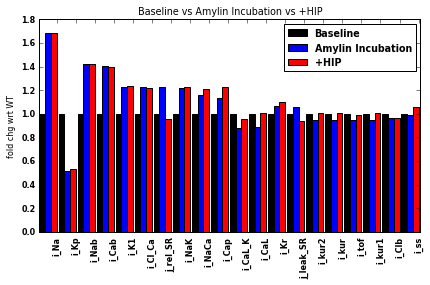

In [422]:
indSS = [5e3,15e3]
xlim = indSS
StateDecompositionAnalysisThree(cases,wanted1="baseline",wanted2="amylin",wanted3="hip",indSS=indSS,xlim=xlim,\
                              mode="fluxes",ranked=20,ignoreList=ignoreList)

In [443]:
#LCC
p_idx = caseExtended1Hz.data['p_idx']
p = caseExtended1Hz.data['p']
print p[p_idx.index('PCa')]
print p[p_idx.index('PCa')]*1.25

NameError: name 'caseExtended1Hz' is not defined